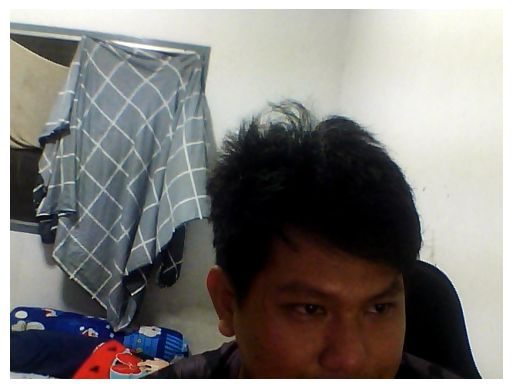

In [ ]:
import cv2
import os
import face_recognition
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# สร้างโฟลเดอร์สำหรับเก็บภาพใบหน้า
face_dir = 'saved_faces/'
if not os.path.exists(face_dir):
    os.makedirs(face_dir)

# เปิดการจับวิดีโอ
video_capture = cv2.VideoCapture(0)

def display_frame(frame):
    """Display a single frame in a Jupyter Notebook"""
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_frame)
    plt.axis('off')  # Hide axes
    clear_output(wait=True)
    display(plt.gcf())

# ฟังก์ชันจับภาพใบหน้า
def capture_faces():
    while True:
        ret, frame = video_capture.read()
        if not ret:
            print("Failed to grab frame")
            break
        
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # ตรวจจับใบหน้า
        face_locations = face_recognition.face_locations(rgb_frame)

        for face_location in face_locations:
            top, right, bottom, left = face_location
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 3)

        display_frame(frame)

        # กด 's' เพื่อบันทึกใบหน้า
        key = cv2.waitKey(1) & 0xFF
        if key == ord('s') and face_locations:
            for face_location in face_locations:
                top, right, bottom, left = face_location
                face_image = frame[top:bottom, left:right]
                face_filename = os.path.join(face_dir, f"face_{len(os.listdir(face_dir))}.jpg")
                cv2.imwrite(face_filename, face_image)
                print(f"Saved {face_filename}")

        # กด 'q' เพื่อออกจากการบันทึกวิดีโอ
        if key == ord('q'):
            break

capture_faces()

# ปิดการจับภาพและทำความสะอาด
video_capture.release()
cv2.destroyAllWindows()
